# Annotation of the dark and light zone in germinal center

In this notebook we will use the previously identified germinal center masks and the raw images of the AICDA immuno-staining to obtain dark-zone masks for the individual germinal center images. To this end, we will use Otsu thresholding and morphological operations to obtain the DZ areas in the individual germinal centers.

In [10]:
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt 
from skimage.filters import threshold_otsu, gaussian
from skimage.morphology import binary_dilation, remove_small_holes, remove_small_objects, binary_closing, binary_erosion
from skimage.color import label2rgb
from skimage.measure import label
from skimage.segmentation import clear_border

import sys

sys.path.append("../..")
from src.utils.base import get_file_list


In [11]:
def segment_dz(img, sigma=10, alpha=0.5, min_hole_size=1e4, min_object_size=1e5, dilation=10, plot=True):
    filtered = gaussian(img, sigma)
    binary = img > img.mean() + alpha*img.std()
    binary = clear_border(binary)
    filled = remove_small_holes(binary, min_hole_size)
    for i in range(dilation):
        filled = binary_dilation(filled)
    for i in range(dilation):
        filled = binary_erosion(filled)
    cleaned = remove_small_objects(filled, min_object_size)
    cleaned = remove_small_holes(cleaned, min_hole_size)


    
    if plot:
        fig, ax = plt.subplots(figsize=[24, 12], ncols=2)
        ax = ax.flatten()
        ax[0].imshow(img)
        ax[1].imshow(label2rgb(cleaned, img, bg_label=0, alpha=0.5))
        plt.show()
        plt.close()
    return cleaned

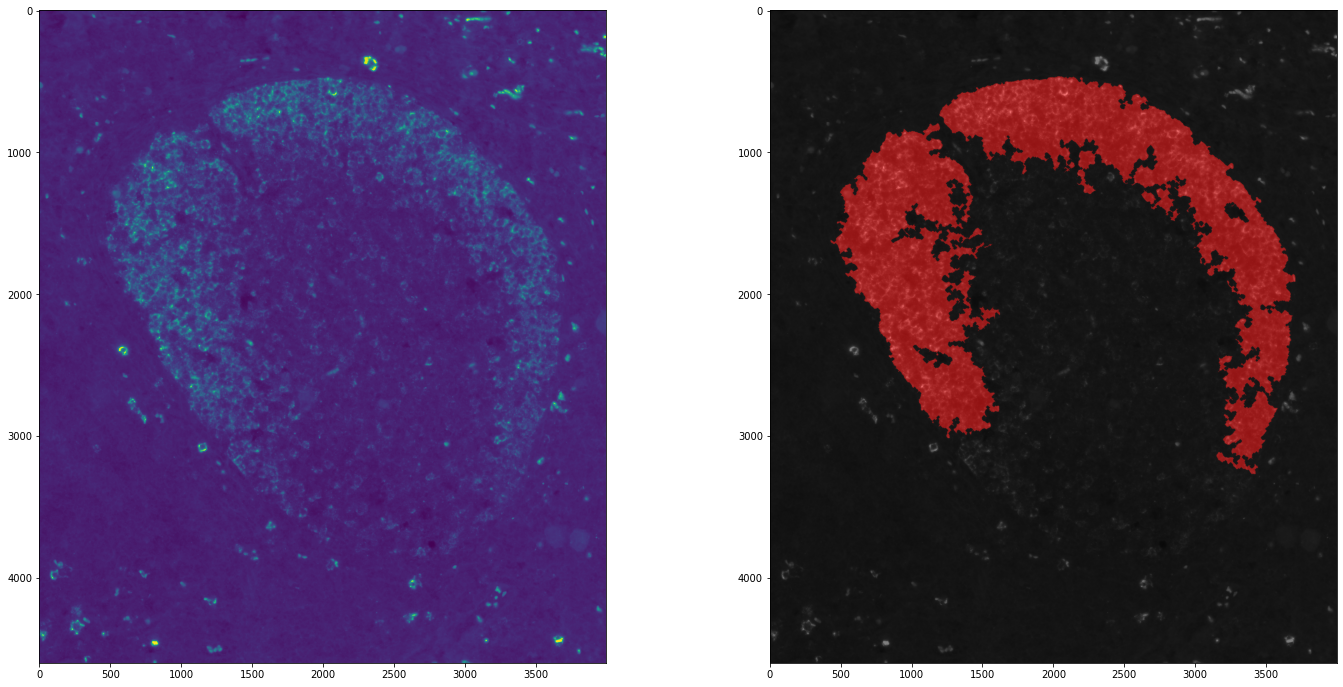

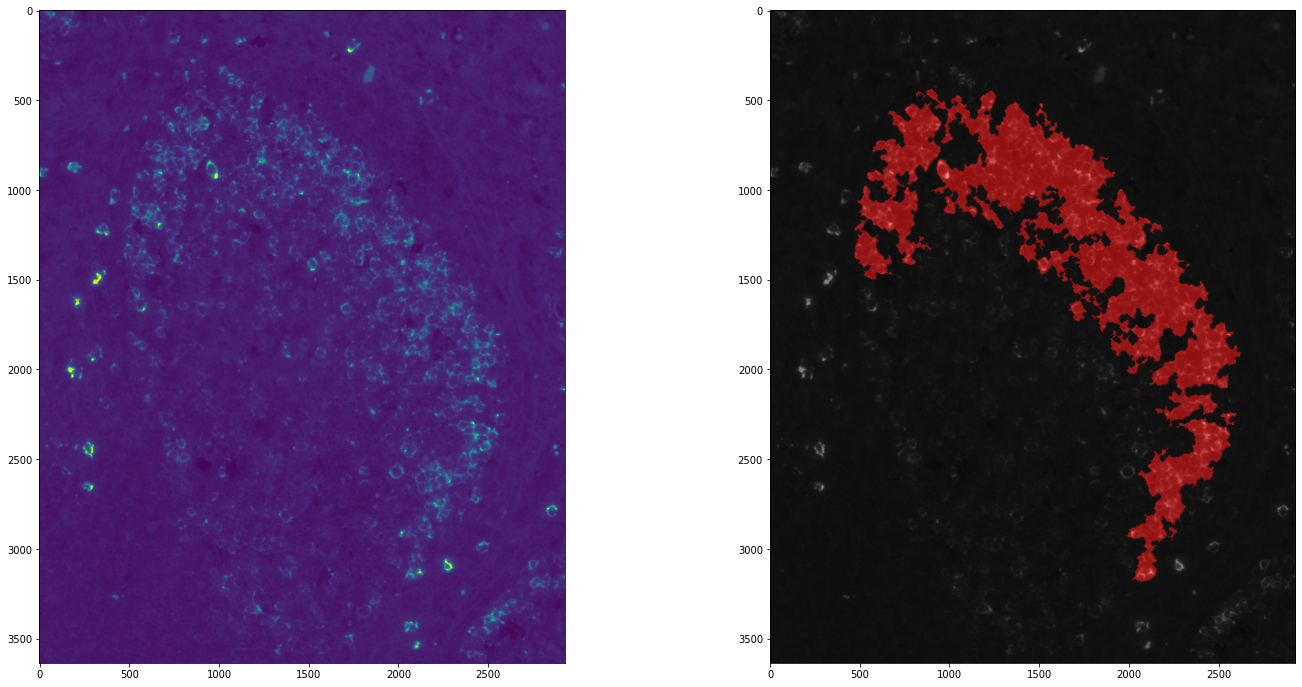

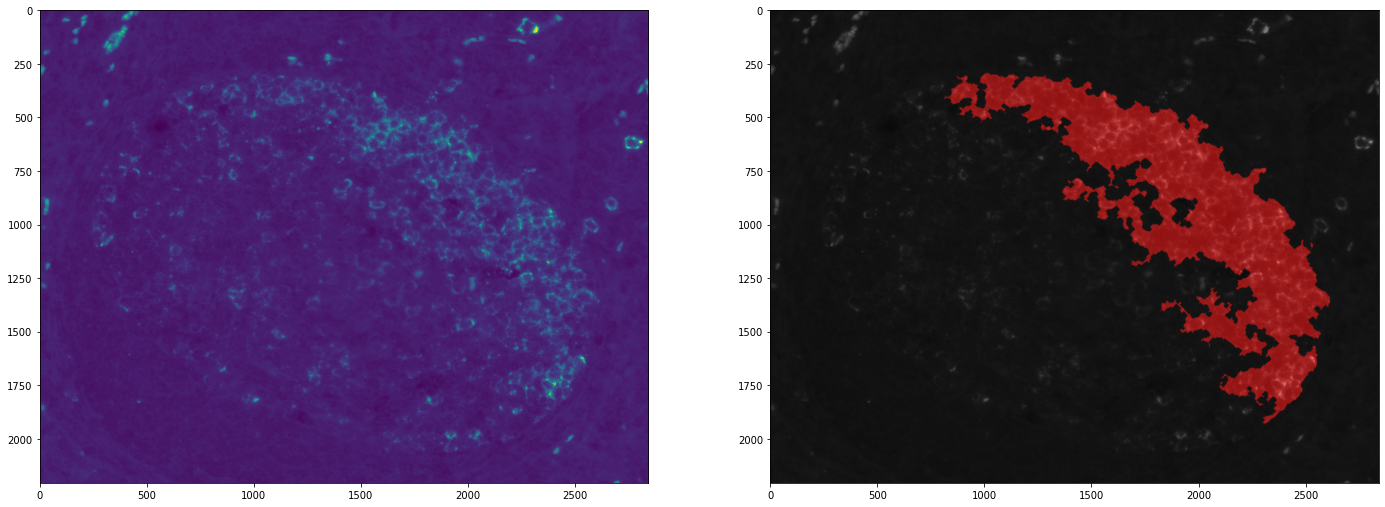

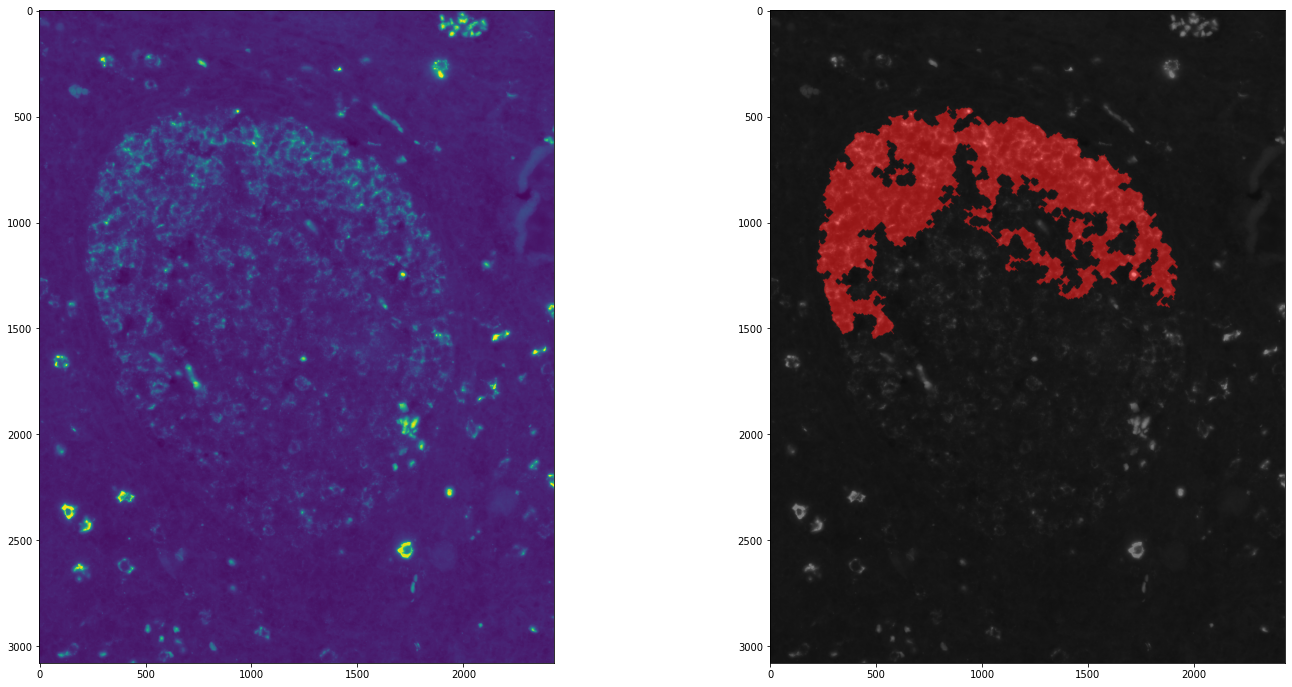

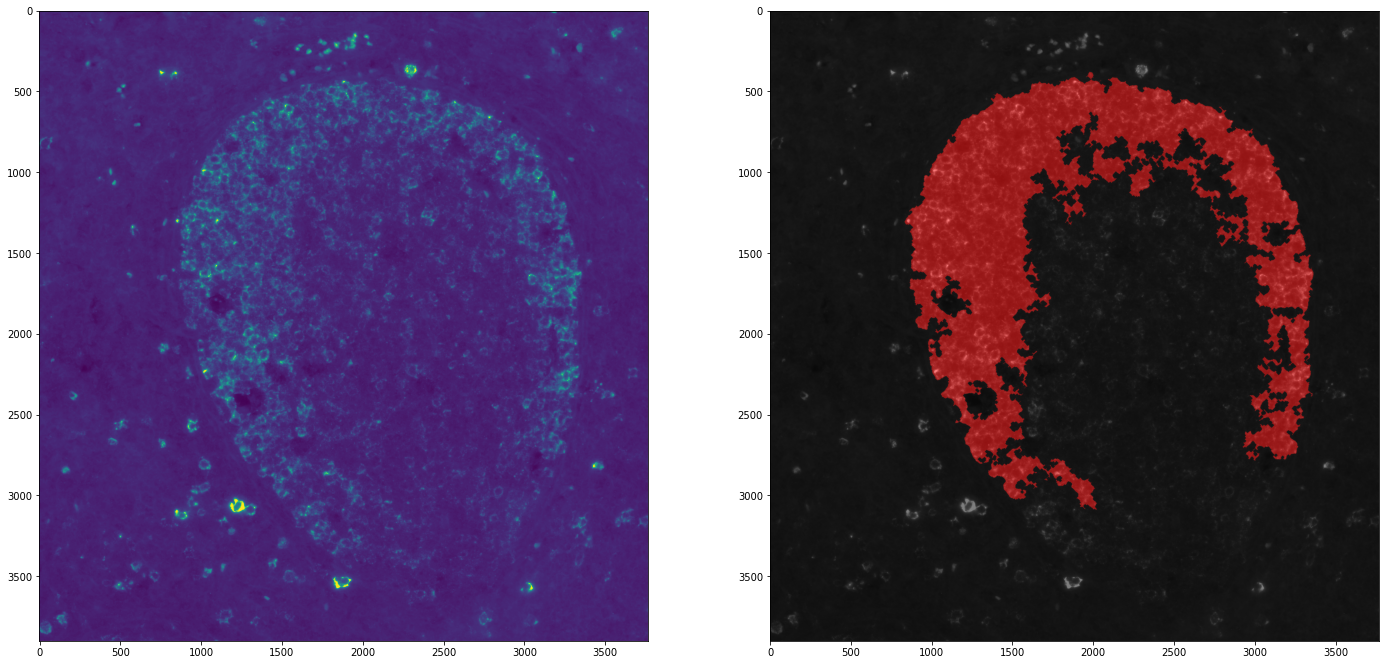

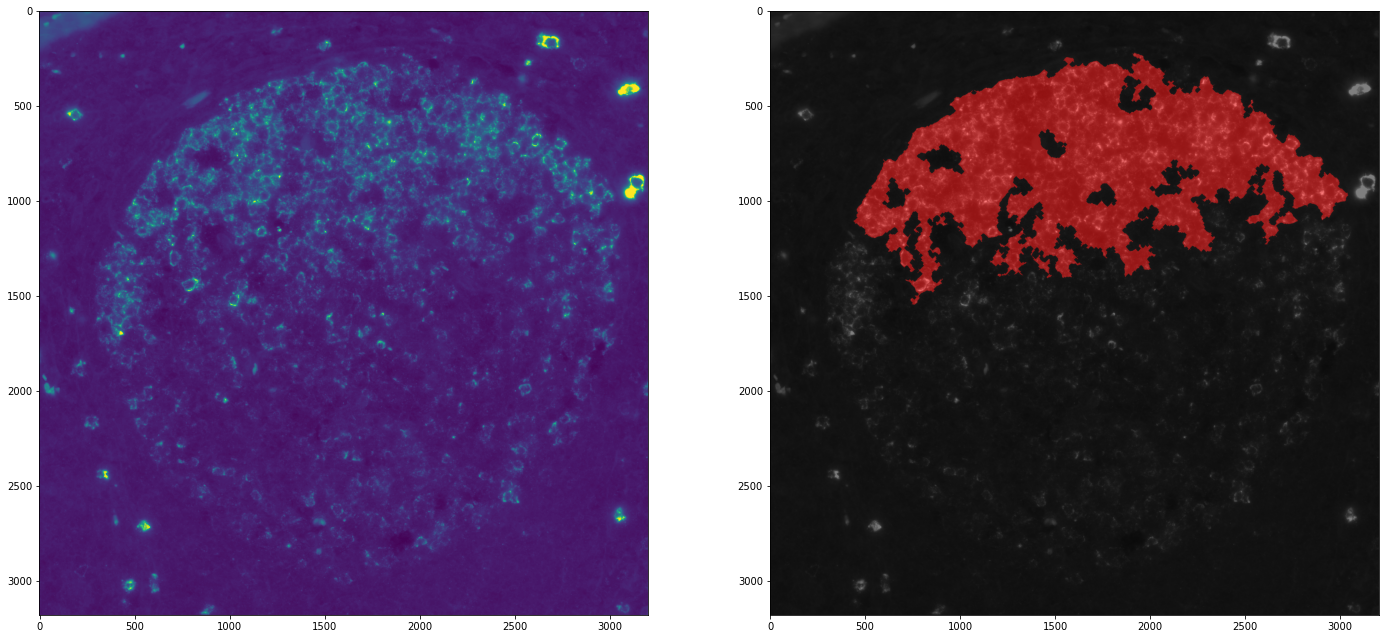

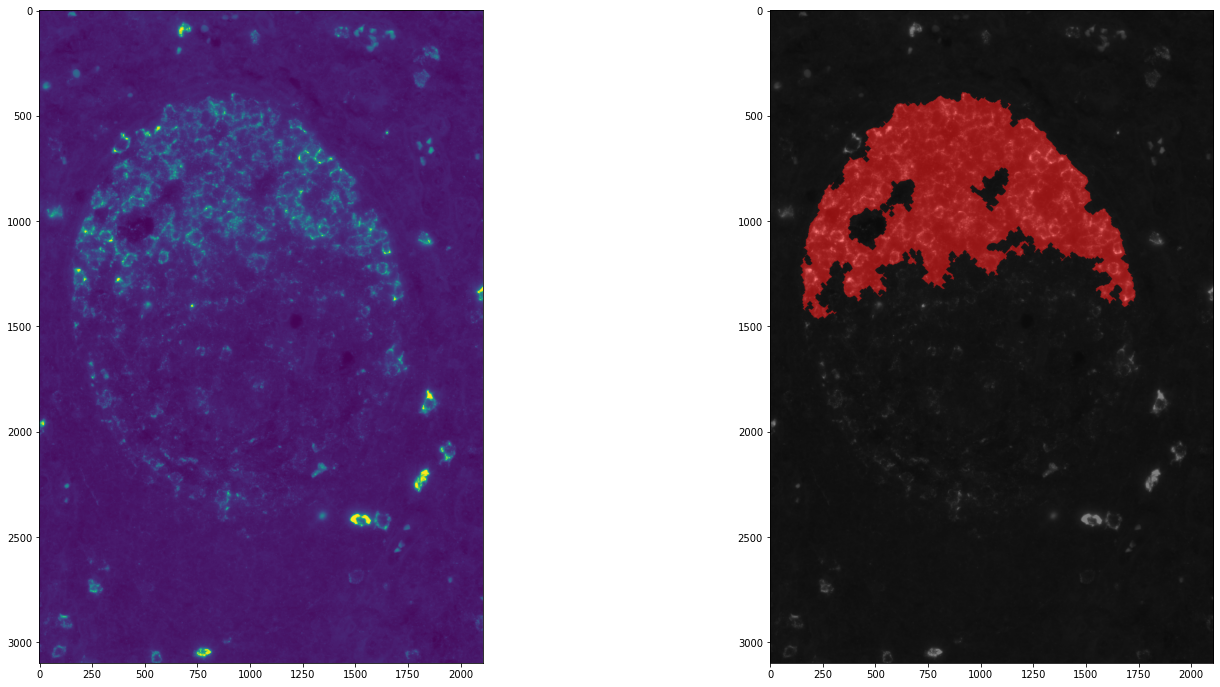

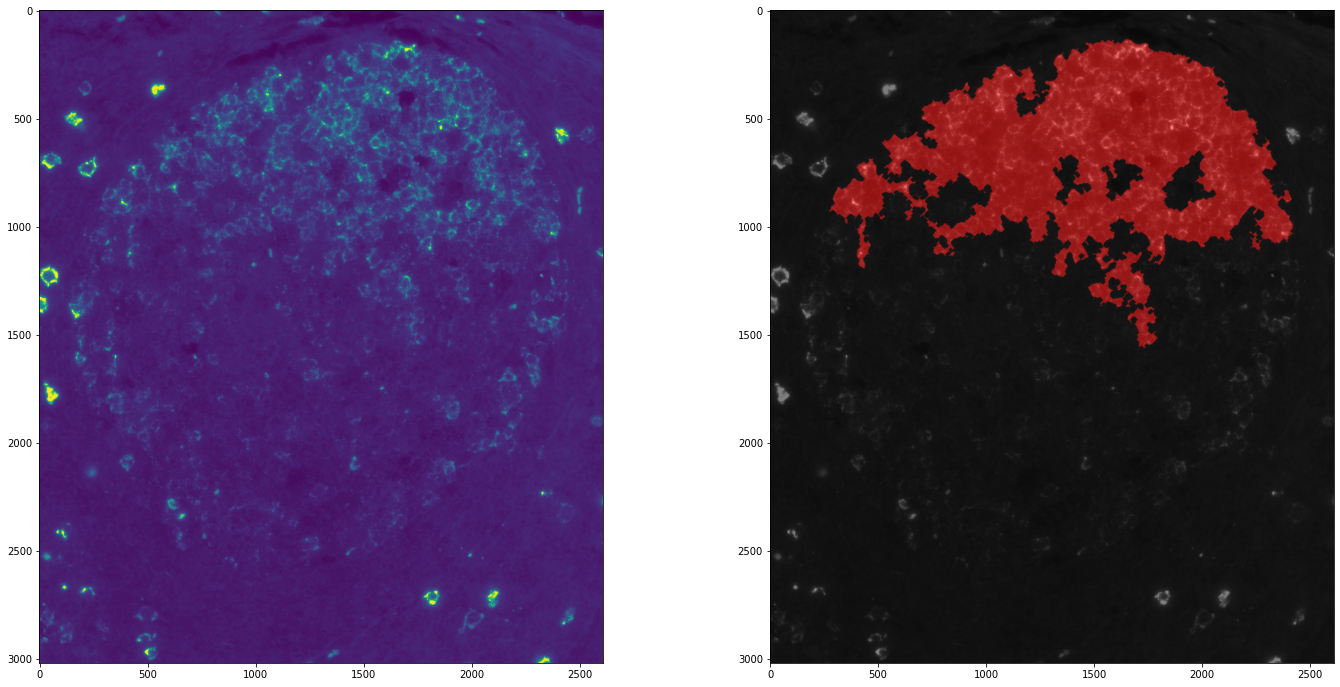

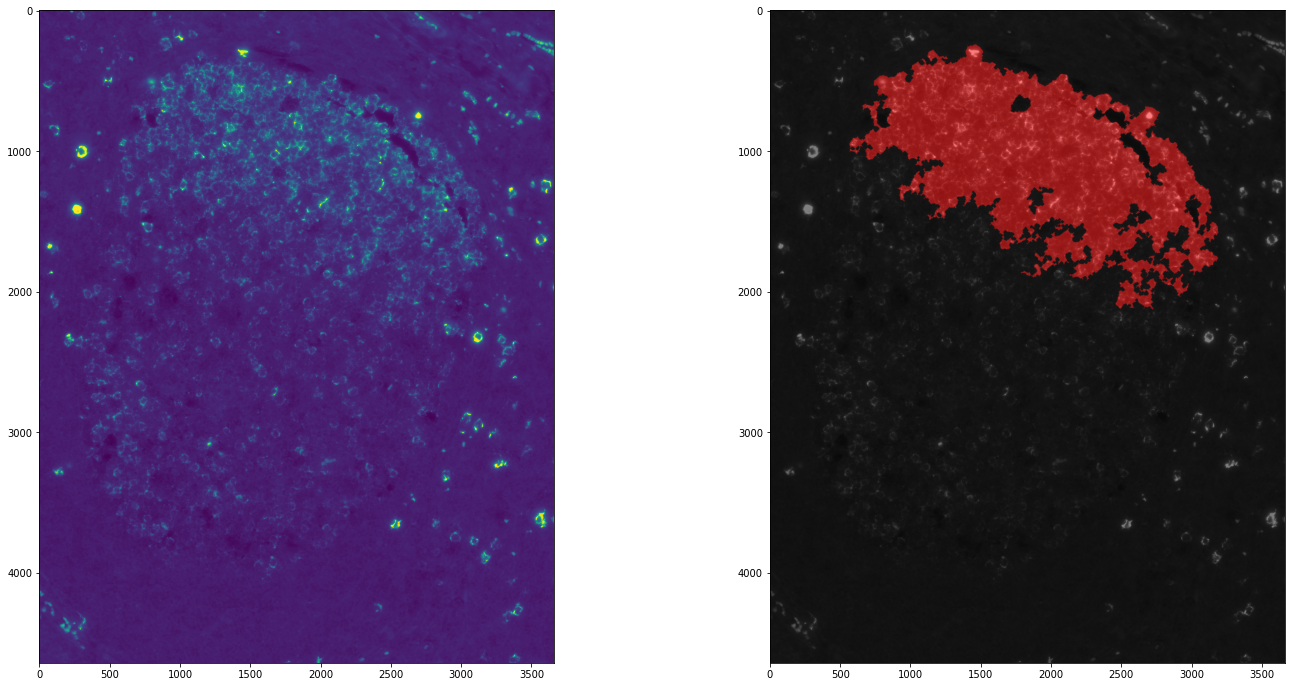

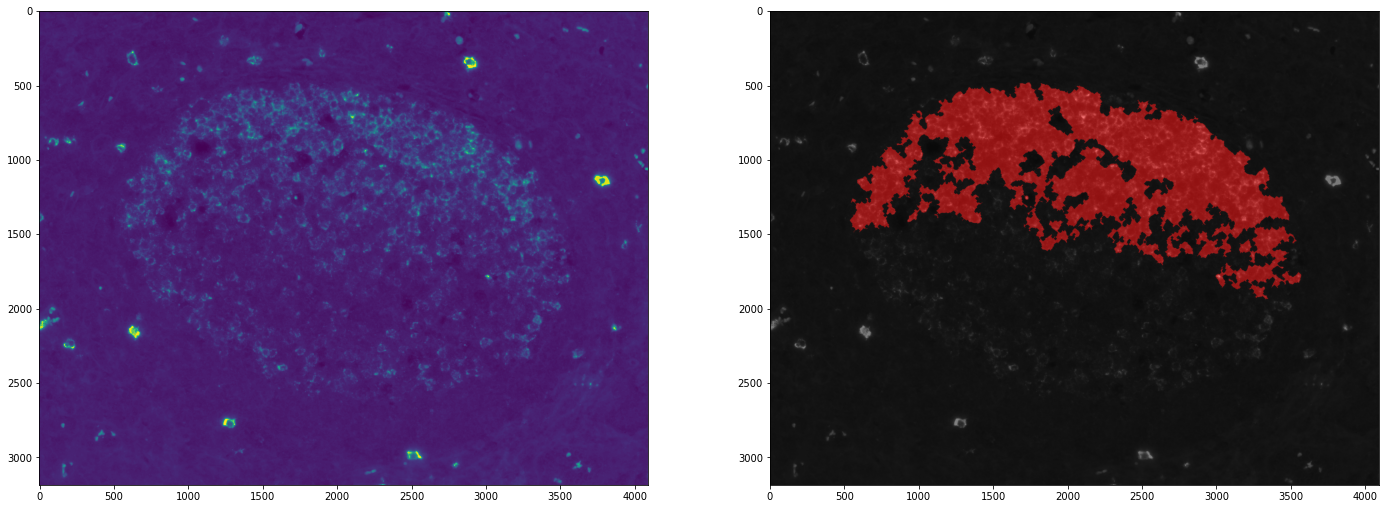

In [13]:
img_locs = get_file_list("../../data/dataset1/images/raw/aicda")
dz_masks = []

for img_loc in img_locs:
    img = imread(img_loc)
    dz_masks = segment_dz(img)